In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

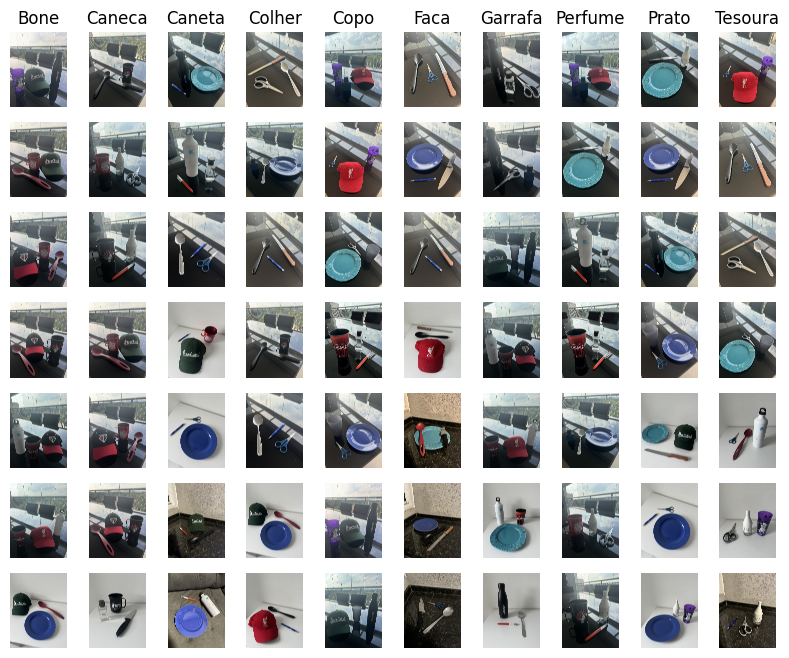

In [4]:
def show_samples_all_classes():
  images_path = os.path.join(os.getcwd(), "Images")
  plt.rcParams['figure.figsize'] = (10.0, 8.0) # set size of plots
  classes = ["Bone", "Caneca", "Caneta", "Colher", "Copo", "Faca", "Garrafa",
          "Perfume", "Prato", "Tesoura"]
  n_samples_per_class = 7
  n_classes = len(classes)
  for counter, label in enumerate(classes):
    for i in range(n_samples_per_class):
        image_path = os.path.join(images_path, label, label.lower() + str(i+1) + ".jpg")
        image = mpimg.imread(image_path)
        plt_idx = i * n_classes + counter + 1  # calculate plot location in the grid
        plt.subplot(n_samples_per_class, n_classes, plt_idx)
        plt.imshow(np.rot90(image, k=-1))
        plt.axis('off')
        if i == 0:
            plt.title(label)  # plot class names above columns
  plt.show()

show_samples_all_classes()

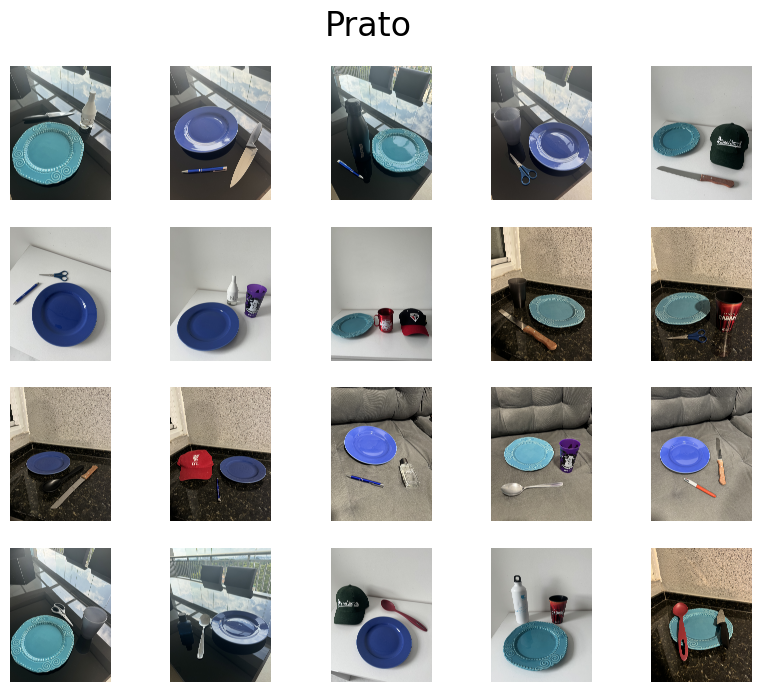

In [5]:
def show_class(label):
  images_path = os.path.join(os.getcwd(), "Images")
  plt.rcParams['figure.figsize'] = (10.0, 8.0) # set size of plots
  n_samples = 20
  for i in range(n_samples):
      image_path = os.path.join(images_path, label, label.lower() + str(i+1) + ".jpg")
      image = mpimg.imread(image_path)
      plt_idx = 4 * (i // 4) + (i % 4) + 1  # calculate plot location in the grid
      plt.subplot(4, 5, plt_idx)
      plt.imshow(np.rot90(image, k=-1))
      plt.axis('off')
  plt.suptitle(label, fontsize=24, y=0.95)
  plt.show()

show_class("Prato")

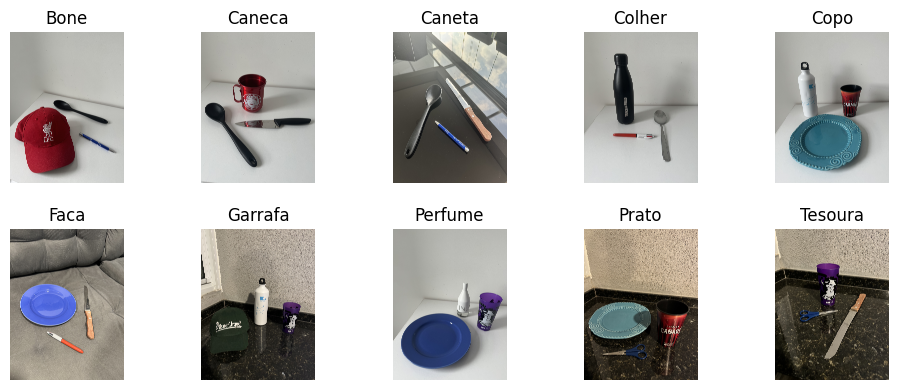

In [6]:
def show_all_classes():
  images_path = os.path.join(os.getcwd(), "Images")
  plt.rcParams['figure.figsize'] = (10.0, 4.0) # set size of plots
  classes = ["Bone", "Caneca", "Caneta", "Colher", "Copo", "Faca", "Garrafa",
          "Perfume", "Prato", "Tesoura"]
  for counter, label in enumerate(classes):
      image_path = os.path.join(images_path, label, label.lower() + str(10) + ".jpg")
      image = mpimg.imread(image_path)
      plt_idx = 2 * (counter // 2) + (counter % 2) + 1  # calculate plot location in the grid
      plt.subplot(2, 5, plt_idx)
      plt.imshow(np.rot90(image, k=-1))
      plt.axis('off')
      plt.title(label)
  plt.tight_layout()
  plt.subplots_adjust(hspace=0.3)
  plt.show()

show_all_classes()

In [15]:
################# SET OF AUXILIARY METHODS ###################

def list_classes():
    images_path = os.path.join(os.getcwd(), "Images")
    items = os.listdir(images_path)
    classes = [item for item in items if os.path.isdir(os.path.join(images_path, item))]
    return classes

def is_jpg(file_path):
    _, file_extension = os.path.splitext(file_path)
    return file_extension.lower() == '.jpg'

def count_images_and_size():
    images_path = os.path.join(os.getcwd(), "Images")
    total_count = 0
    total_size = 0
    items = os.listdir(images_path)

    for item in items:
        item_path = os.path.join(images_path, item)
        if os.path.isdir(item_path):
            # Count the number of images in the directory
            images = [f for f in os.listdir(item_path) if (os.path.isfile(os.path.join(item_path, f))
                                                           and is_jpg(f))]
            total_count += len(images)
            for image in images:
                image_path = os.path.join(item_path, image)
                total_size += os.path.getsize(image_path)
    return total_count, total_size

def get_resolution():
  images_path = os.path.join(os.getcwd(), "Images")
  items = os.listdir(images_path)
  item_path = os.path.join(images_path, items[0])
  images = [os.path.join(item_path, f) for f in os.listdir(item_path) if (os.path.isfile(os.path.join(item_path, f))
                                                                          and is_jpg(f))]
  image_path = images[0]
  image = np.rot90(mpimg.imread(image_path), k=-1)
  height, width, _ = image.shape
  return height, width

print(list_classes())
print(count_images_and_size())
print(get_resolution())

['Tesoura', 'Prato', 'Caneta', 'Copo', 'Perfume', 'Bone', 'Colher', 'Garrafa', 'Caneca', 'Faca']
(300, 736216038)
(5712, 4284)


In [14]:
def show_global_table():
  print("================================================================")
  print("Tabela Global Sumária:")
  classes = list_classes()
  print("--> Nome das Classes:", classes)
  print("--> Número de Classes:", len(classes))
  n_images, total_size = count_images_and_size()
  print("--> Número de Imagens:", n_images)
  print("--> Tamanho da Base (Bytes): ", total_size, " (", "{:.2f}".format(total_size / 1e6), " MB)", sep="")
  height, width = get_resolution()
  print("--> Resolução das Imagens:", height, "linhas por", width, "colunas")
  print("================================================================")

show_global_table()

Tabela Global Sumária:
--> Nome das Classes: ['Tesoura', 'Prato', 'Caneta', 'Copo', 'Perfume', 'Bone', 'Colher', 'Garrafa', 'Caneca', 'Faca']
--> Número de Classes: 10
--> Número de Imagens: 300
--> Tamanho da Base (Bytes): 736216038 (736.22 MB)
--> Resolução das Imagens: 5712 linhas por 4284 colunas


In [43]:
def show_class_tables():
    images_path = os.path.join(os.getcwd(), "Images")
    items = os.listdir(images_path)

    for item in items:
        if item == ".DS_Store": # compatibility with MACOS systems.
            continue
        print("\n================================================================")
        csv_path = os.path.join(images_path, item, item.lower() + "-metadata.csv")
        df = pd.read_csv(csv_path)
        light_variations = df[['Local', 'Periodo']].drop_duplicates().values
        back_variations = df[["Fundo"]].drop_duplicates().values
        n_items = df[["N_Itens"]].drop_duplicates().values
        n_images = len([f for f in os.listdir(os.path.join(images_path, item)) if is_jpg(f)])
        print(" ==> Nome da classe:", item)
        print(" ==> Numero de objetos por imagem:", n_items[0][0])
        print(" ==> Variacoes de fundo:", back_variations.shape[0], end=" -> ")
        for back in back_variations:
            print(back[0], end=" ")
        print()
        print(" ==> Variacoes de iluminacao:", light_variations.shape[0], end=" -> ")
        for light in light_variations:
            print(tuple(light), end=" ")
        print()
        print(" ==> Total de amostras:", n_images)
        print("================================================================")

show_class_tables()


 ==> Nome da classe: Tesoura
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Marmore Sofa 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Fora', 'Noite') ('Dentro', 'Noite') 
 ==> Total de amostras: 28

 ==> Nome da classe: Prato
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Marmore Sofa 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Fora', 'Noite') ('Dentro', 'Noite') 
 ==> Total de amostras: 24

 ==> Nome da classe: Caneta
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Marmore Sofa 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Fora', 'Noite') ('Dentro', 'Noite') 
 ==> Total de amostras: 25

 ==> Nome da classe: Copo
 ==> Numero de objetos por imagem: 3
 ==> Variacoes de fundo: 4 -> Sacada Branco Marmore Sofa 
 ==> Variacoes de iluminacao: 4 -> ('Fora', 'Dia') ('Dentro', 'Dia') ('Fora', 'Noite') ('Dentro', 'No